<a href="https://colab.research.google.com/github/Asaf95/Apple-stock-price-prediction/blob/with_ui_a/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Data-Mi/Project_2/DATA/data.csv")
#df = pd.read_csv(data, encoding = "ISO-8859-1")
df = pd.DataFrame(df)

df

,date,1. open,2. high,3. low,4. close,5. volume
0,2022-03-28,172.17,175.73,172.00,175.60,90371916.0
1,2022-03-25,173.88,175.28,172.75,174.72,80281664.0
2,2022-03-24,171.06,174.14,170.21,174.07,90131418.0
3,2022-03-23,167.99,172.64,167.65,170.21,98062674.0
4,2022-03-22,165.51,169.42,164.91,168.82,80979755.0
...,...,...,...,...,...,...
5633,1999-11-05,84.62,88.37,84.00,88.31,3721500.0
5634,1999-11-04,82.06,85.37,80.62,83.62,3384700.0
5635,1999-11-03,81.62,83.25,81.00,81.50,2932700.0
5636,1999-11-02,78.00,81.69,77.31,80.25,3564600.0


In [4]:
from datetime import datetime
df['date'] = df.apply(lambda x: pd.to_datetime(x['date'], format = '%Y-%m-%d') ,axis=1)


In [5]:
def apply_stock_split1(number, date):
  list_of_columns = ['high', 'low','close','open']
  list_of_columns1 = ['volume']
  for item in list_of_columns:
    df['temp'] = df[(df['date'] < date)][item].div(number)
    df['temp2'] = df['temp'].fillna(df[item])
    df[item] = df['temp2']
    
  df['temp'] = df[(df['date'] < date)]['volume'].div(1/number)
  df['temp2'] = df['temp'].fillna(df['volume'])
  df['volume'] = df['temp2']
      # Add a temp value to store tha colounm values temperery.
      #only if the new value is not NaN replace it with the real value for that row
thisdict = {
  "2020-08-31": 4,
  "2014-06-9": 7,
  "2005-02-28": 2,
  "2000-06-21":2,
  "1987-06-16":2
}


"""
for key, value in thisdict.items():
  print(key, ' and ', value)
  #apply_stock_split1(key, value)
    #apply_stock_split1(4,"2020-09-02")
"""

'\nfor key, value in thisdict.items():\n  print(key, \' and \', value)\n  #apply_stock_split1(key, value)\n    #apply_stock_split1(4,"2020-09-02")\n'

In [6]:
df_analysis = df.copy()

In [7]:
df_1999_2009 = df_analysis[(df_analysis['date'] <  "2009-01-1")].copy()
df_2009_2022 = df_analysis[(df_analysis['date'] >  "2009-01-1")].copy()


##Data Analysis

By the graph, we see that between the years 2008-2009 the stock value has down.

In [ ]:
import matplotlib.pyplot as plt
df.pop('date')
גכdf.index.pop('date')
#plt.plot(df.index, df['close'])

KeyError: ignored

In [ ]:
list_of_columns_analysis = ["open",	"high",	"low",	"close",	"volume"]

for item in list_of_columns_analysis:
  plt.plot(df.index, df[item])
  plt.legend(item)
  plt.show()


KeyError: ignored

In [ ]:
"""
import matplotlib.pyplot as plt
df.index = df.pop('date')
plt.plot(df.index, df['close'])
"""

"\nimport matplotlib.pyplot as plt\ndf.index = df.pop('date')\nplt.plot(df.index, df['close'])\n"

In [ ]:
"""
plt.plot(df.index, df['high'])
plt.plot(df.index,  df['low'])
plt.legend(['high', 'low'])
"""

"\nplt.plot(df.index, df['high'])\nplt.plot(df.index,  df['low'])\nplt.legend(['high', 'low'])\n"

## date are later then 2009

In [ ]:
import matplotlib.pyplot as plt
df_1999_2009.index = df_1999_2009.pop('date')
#plt.plot(df_1999_2009.index, df_1999_2009['close'])

KeyError: ignored

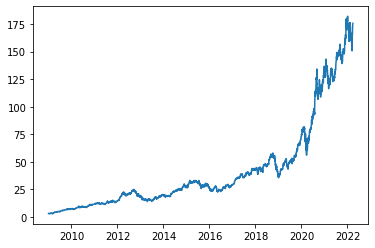

In [ ]:
import matplotlib.pyplot as plt
df_2009_2022.index = df_2009_2022.pop('Date')
plt.plot(df_2009_2022.index, df_2009_2022['Close'])

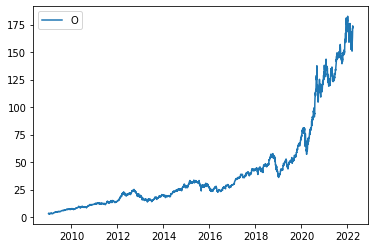

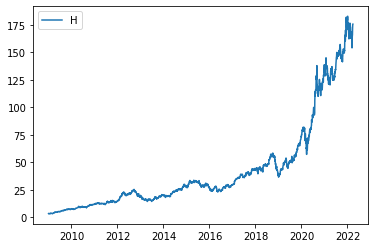

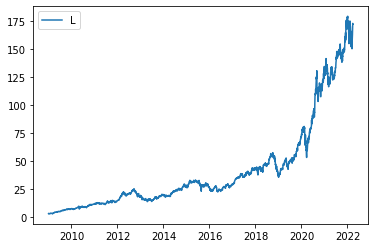

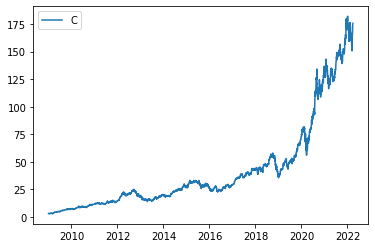

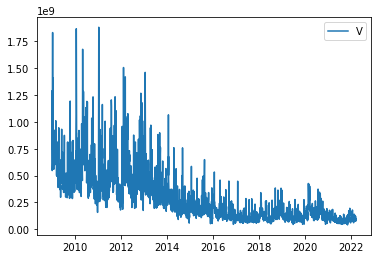

In [ ]:
list_of_columns_analysis = ["Open",	"High",	"Low",	"Close",	"Volume"]

for item in list_of_columns_analysis:
  plt.plot(df_2009_2022.index, df_2009_2022[item])
  plt.legend(item)
  plt.show()

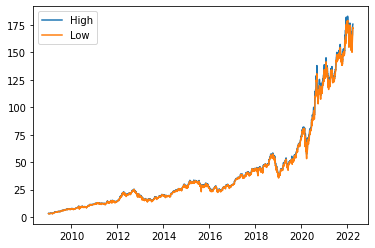

In [ ]:
plt.plot(df_2009_2022.index, df_2009_2022['High'])
plt.plot(df_2009_2022.index,  df_2009_2022['Low'])
plt.legend(['High', 'Low'])

In [ ]:
plt.plot(df.index, df['Close'])

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Open,High,Low,Close,Volume,temp,temp2
Date,,,,,,,
2022-03-28,172.170000,175.730000,172.000000,175.600000,90371916.0,NaN,90371916.0
2022-03-25,173.880000,175.280000,172.750000,174.720000,80281664.0,NaN,80281664.0
2022-03-24,171.060000,174.140000,170.210000,174.070000,90131418.0,NaN,90131418.0
2022-03-23,167.990000,172.640000,167.650000,170.210000,98062674.0,NaN,98062674.0
2022-03-22,165.510000,169.420000,164.910000,168.820000,80979755.0,NaN,80979755.0
...,...,...,...,...,...,...,...
1999-11-05,0.755536,0.789018,0.750000,0.788482,416808000.0,NaN,416808000.0
1999-11-04,0.732679,0.762232,0.719821,0.746607,379086400.0,NaN,379086400.0
1999-11-03,0.728750,0.743304,0.723214,0.727679,328462400.0,NaN,328462400.0


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

KeyError: ignored

In [ ]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Volume,temp,temp2
Date,,,,,,,
2022-03-28,172.170000,175.730000,172.000000,175.600000,90371916.0,NaN,90371916.0
2022-03-25,173.880000,175.280000,172.750000,174.720000,80281664.0,NaN,80281664.0
2022-03-24,171.060000,174.140000,170.210000,174.070000,90131418.0,NaN,90131418.0
2022-03-23,167.990000,172.640000,167.650000,170.210000,98062674.0,NaN,98062674.0
2022-03-22,165.510000,169.420000,164.910000,168.820000,80979755.0,NaN,80979755.0
...,...,...,...,...,...,...,...
1999-11-05,0.755536,0.789018,0.750000,0.788482,416808000.0,NaN,416808000.0
1999-11-04,0.732679,0.762232,0.719821,0.746607,379086400.0,NaN,379086400.0
1999-11-03,0.728750,0.743304,0.723214,0.727679,328462400.0,NaN,328462400.0


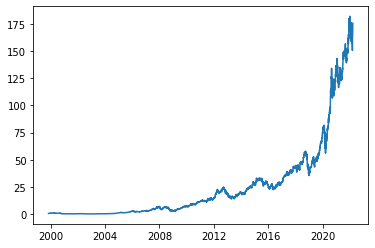

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
df = df.iloc[::-1]
df

,Open,High,Low,Close,Volume,temp,temp2
Date,,,,,,,
1999-11-01,0.714286,0.720446,0.690804,0.693036,278577600.0,NaN,278577600.0
1999-11-02,0.696429,0.729375,0.690268,0.716518,399235200.0,NaN,399235200.0
1999-11-03,0.728750,0.743304,0.723214,0.727679,328462400.0,NaN,328462400.0
1999-11-04,0.732679,0.762232,0.719821,0.746607,379086400.0,NaN,379086400.0
1999-11-05,0.755536,0.789018,0.750000,0.788482,416808000.0,NaN,416808000.0
...,...,...,...,...,...,...,...
2022-03-22,165.510000,169.420000,164.910000,168.820000,80979755.0,NaN,80979755.0
2022-03-23,167.990000,172.640000,167.650000,170.210000,98062674.0,NaN,98062674.0
2022-03-24,171.060000,174.140000,170.210000,174.070000,90131418.0,NaN,90131418.0


In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2009-01-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2009-01-25,2.792857,2.958214,3.155714,3.155714
1,2009-01-27,3.155714,3.155714,3.201429,3.240357
2,2009-01-28,3.155714,3.201429,3.240357,3.364286
3,2009-01-29,3.201429,3.240357,3.364286,3.321429
4,2009-01-30,3.240357,3.364286,3.321429,3.218929
...,...,...,...,...,...
3309,2022-03-17,150.620000,155.090000,159.590000,160.620000
3310,2022-03-18,155.090000,159.590000,160.620000,163.980000
3311,2022-03-21,159.590000,160.620000,163.980000,165.380000
3312,2022-03-22,160.620000,163.980000,165.380000,168.820000


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((3314,), (3314, 3, 1), (3314,))

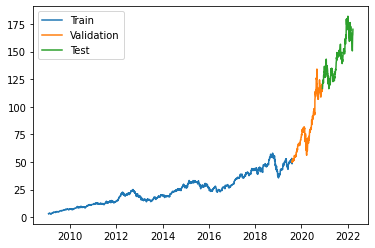

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
83/83 [==============================] - 3s 10ms/step - loss: 418.2424 - mean_absolute_error: 15.9501 - val_loss: 3278.6130 - val_mean_absolute_error: 52.0947
Epoch 2/100
83/83 [==============================] - 0s 5ms/step - loss: 9.4626 - mean_absolute_error: 1.3673 - val_loss: 1341.0024 - val_mean_absolute_error: 28.9618
Epoch 3/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3873 - mean_absolute_error: 0.3783 - val_loss: 1212.1323 - val_mean_absolute_error: 26.9243
Epoch 4/100
83/83 [==============================] - 0s 5ms/step - loss: 0.2919 - mean_absolute_error: 0.3447 - val_loss: 1151.2823 - val_mean_absolute_error: 25.8226
Epoch 5/100
83/83 [==============================] - 0s 5ms/step - loss: 0.2740 - mean_absolute_error: 0.3418 - val_loss: 1114.5375 - val_mean_absolute_error: 25.2098
Epoch 6/100
83/83 [==============================] - 0s 5ms/step - loss: 0.2946 - mean_absolute_error: 0.3685 - val_loss: 1094.2729 - val_mean_absolute_error: 24

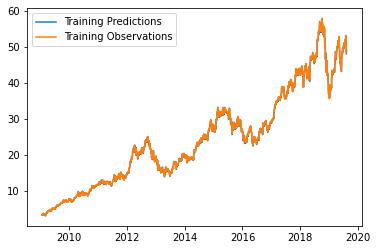

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

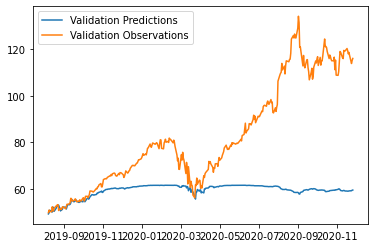

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

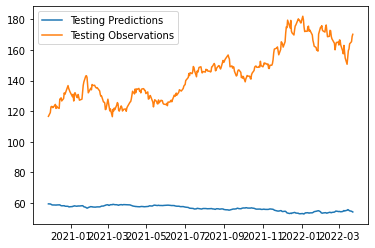

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

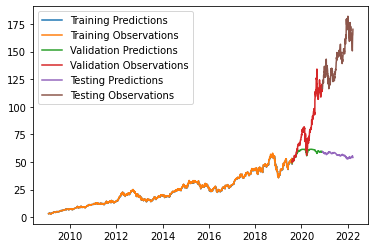

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

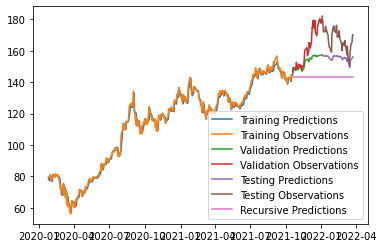

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

Polynomial Regression